In [52]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
df_can = pd.read_excel('C:/Users/Rizqatasyaa/OneDrive/Documents/HACTIVE/Canada.xlsx',
             sheet_name='Canada by Citizenship',
             skiprows=range(20),
             skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
# clean up the dataset to remove unnecessary columns
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# rename the columns
df_can.rename(columns= {'OdName':'Country',
                         'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set country name as index
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


C:\Users\Rizqatasyaa\AppData\Local\Temp\ipykernel_19004\2351911912.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


## Visualizing Data using Matplotlib

In [5]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

## Waffle Charts

In [6]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'],:]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [7]:
# Membuat waffle
#step1

total_values = sum(df_dsn['Total'])
category_proportions = [(float(value)/total_values) for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i]+': '+ str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [8]:
#step2

width = 40
height = 10

total_num_tiles = width * height

print('Total number of tiles is', total_num_tiles)

Total number of tiles is 400


In [9]:
#step3

tiles_per_category = [round(proportion*total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i]+': '+ str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [10]:
#step4

waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        
        waffle_chart[row, col] = category_index

print('Waffle chart populated!')

Waffle chart populated!


In [11]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

C:\Users\Rizqatasyaa\AppData\Local\Temp\ipykernel_19004\1163859833.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

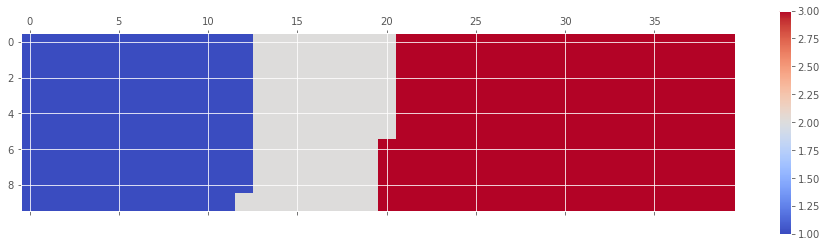

In [12]:
#step5

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

C:\Users\Rizqatasyaa\AppData\Local\Temp\ipykernel_19004\3453712002.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

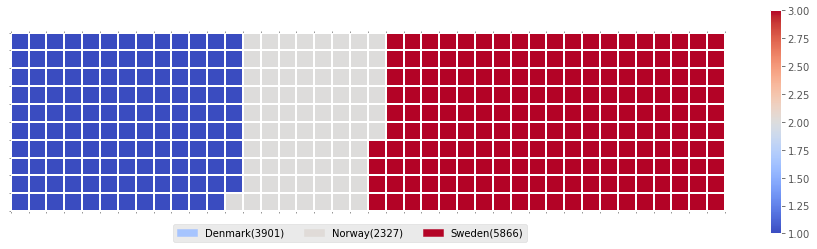

In [13]:
#step6, percantik

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])


values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum)-1]

#create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + '('+ str(df_dsn['Total'][i])+')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

#add legend to chart
plt.legend(handles=legend_handles,
          loc='lower center',
          ncol=len(df_dsn.index.values),
          bbox_to_anchor=(.0, -0.2, 0.95, .1)
          )

In [14]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    total_values = sum(df_dsn['Total'])
    category_proportions = [(float(value)/total_values) for value in df_dsn['Total']]

    total_num_tiles = width * height
    print('Total number of tiles is', total_num_tiles)

    tiles_per_category = [round(proportion*total_num_tiles) for proportion in category_proportions]

    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i]+': '+ str(tiles))

    waffle_chart = np.zeros((height, width))

    category_index = 0
    tile_index = 0

    for col in range(width):
        for row in range(height):
            tile_index += 1
        
            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1
        
            waffle_chart[row, col] = category_index

    fig = plt.figure()

    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    ax = plt.gca()

    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])


    values_cumsum = np.cumsum(df_dsn['Total'])
    total_values = values_cumsum[len(values_cumsum)-1]

#create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == "%":
            label_str = category + '(' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + '(' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

#add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(.0, -0.2, 0.95, .1)
    )

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


C:\Users\Rizqatasyaa\AppData\Local\Temp\ipykernel_19004\300777278.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

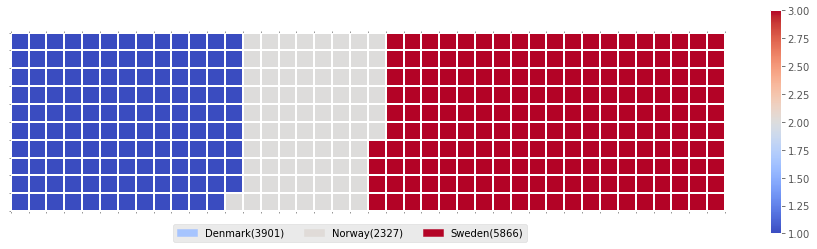

In [15]:
width = 40
height = 10

categories = df_dsn.index.values
values = df_dsn['Total']

colormap = plt.cm.coolwarm

create_waffle_chart(categories, values, height, width, colormap)

## Word Clouds

In [16]:
!conda install -c conda-forge wordcloud --yes

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::certifi-2021.10.8-py39haa95532_2
  - anaconda/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::openssl-1.1.1n-h2bbff1b_0, defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2
  - defaults/win-64::ca-certificates-2022.3.29-haa95532_1, defaults/win-64::certifi-2021.10.8-py39haa95532_2, defaults/win-64::openssl-1.1.1n-h2bbff1b_0
  - anaconda/win-64::certifi-2021.10.8-py39haa

In [17]:
from wordcloud import WordCloud, STOPWORDS

In [18]:
alice_novel = open('alice_novel.txt', 'r').read()

stopwords = set(STOPWORDS)

In [19]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

alice_wc.generate(alice_novel)

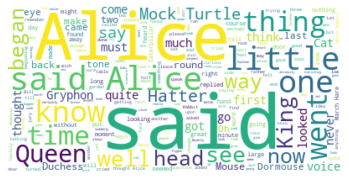

In [20]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

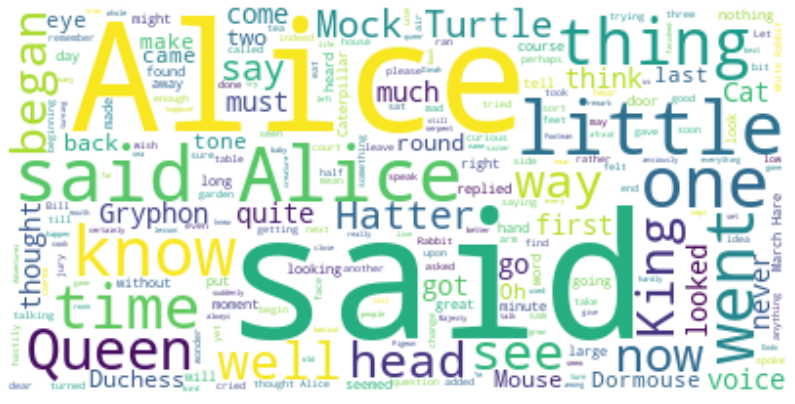

In [21]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

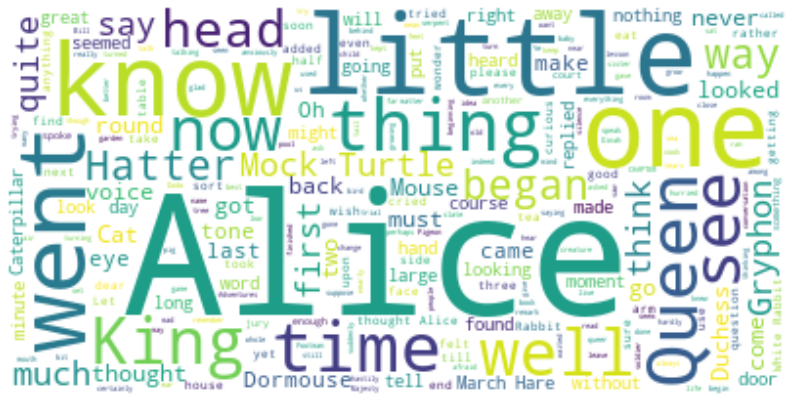

In [22]:
stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
alice_mask = np.array(Image.open('alice_mask.png'))

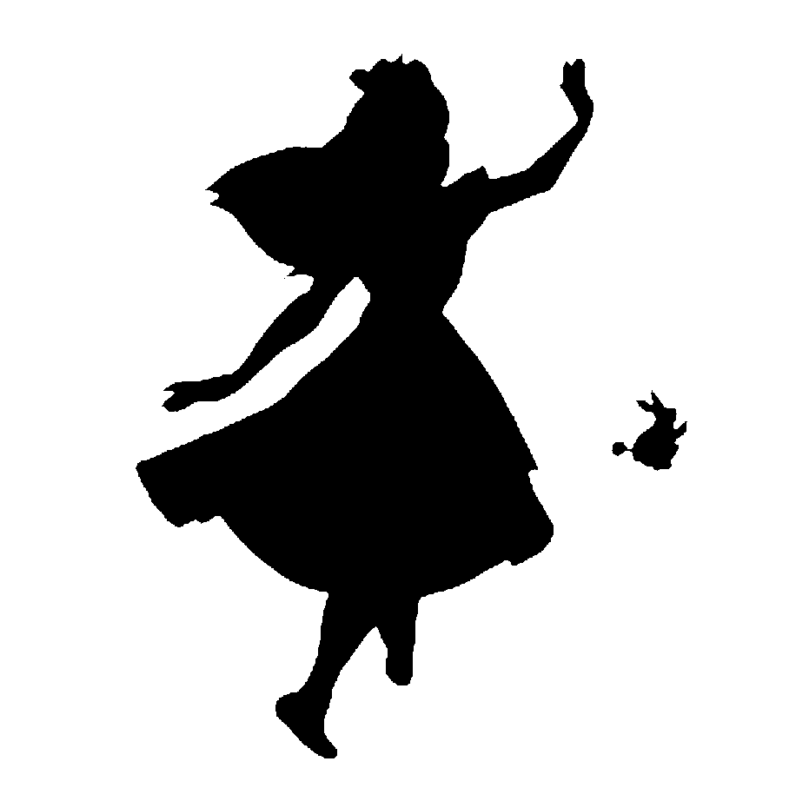

In [24]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

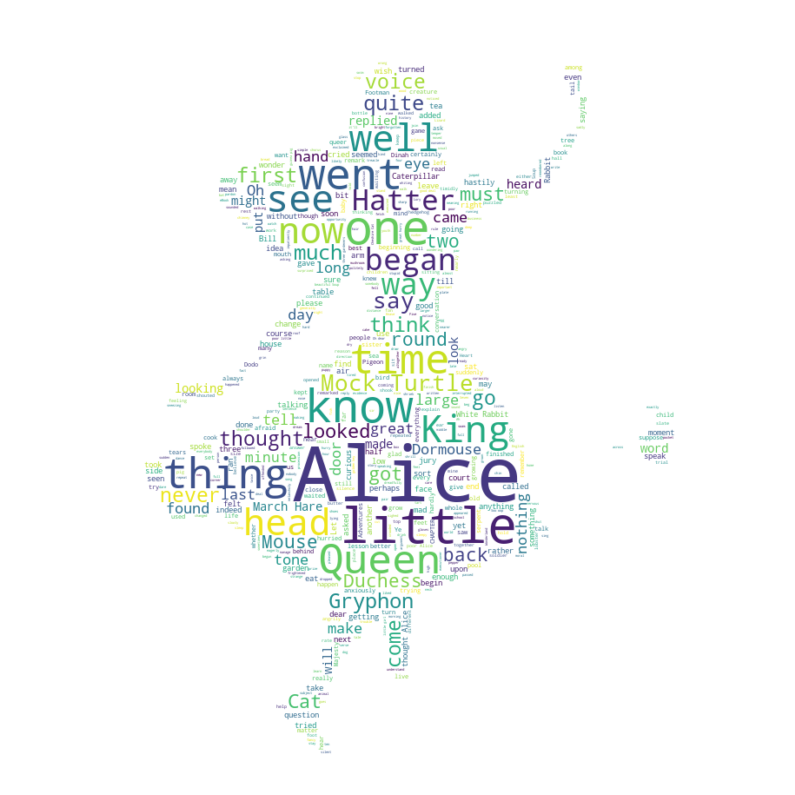

In [25]:
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [27]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [28]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ')*repeat_num_times)
        
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

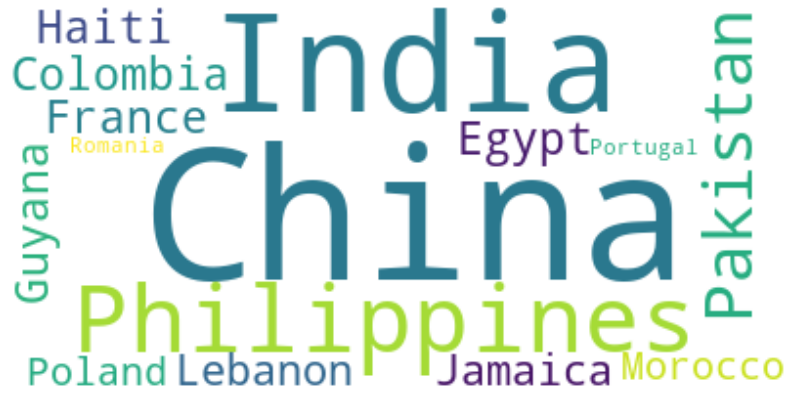

In [29]:
#creat the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression Plots

In [30]:
import seaborn as sns

In [31]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(float, df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


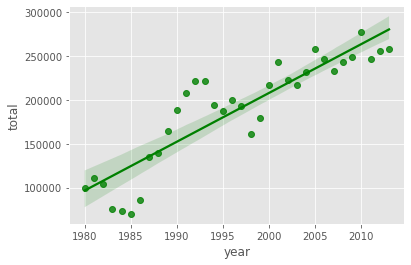

In [32]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

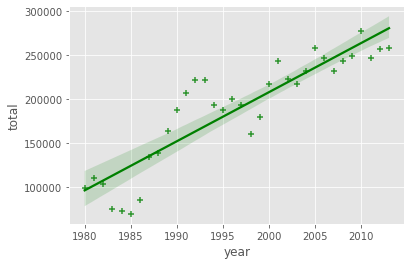

In [33]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

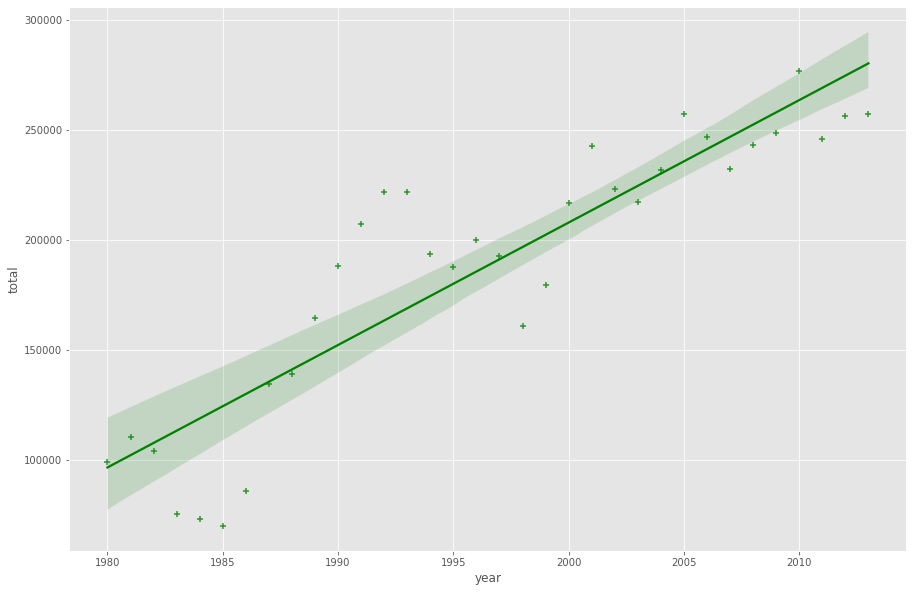

In [34]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

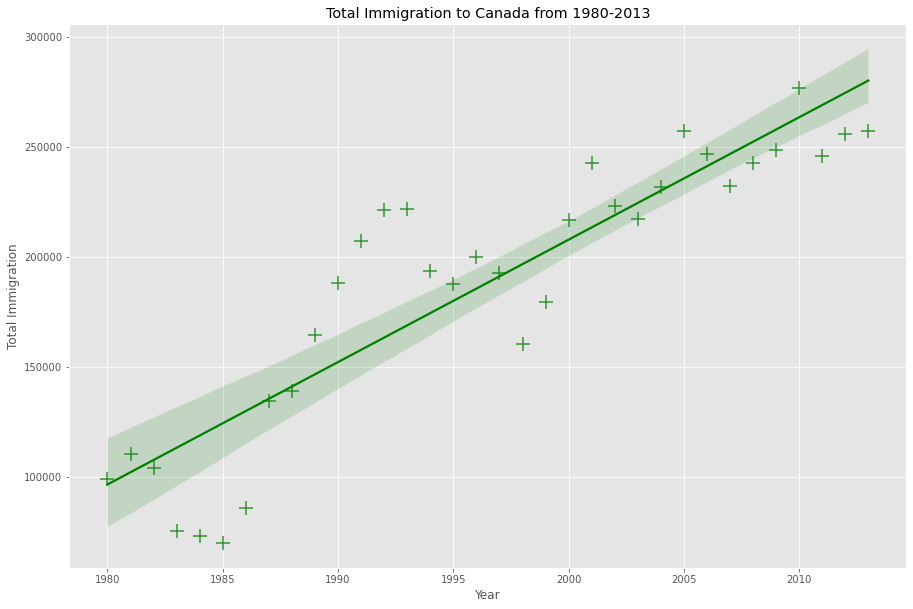

In [35]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

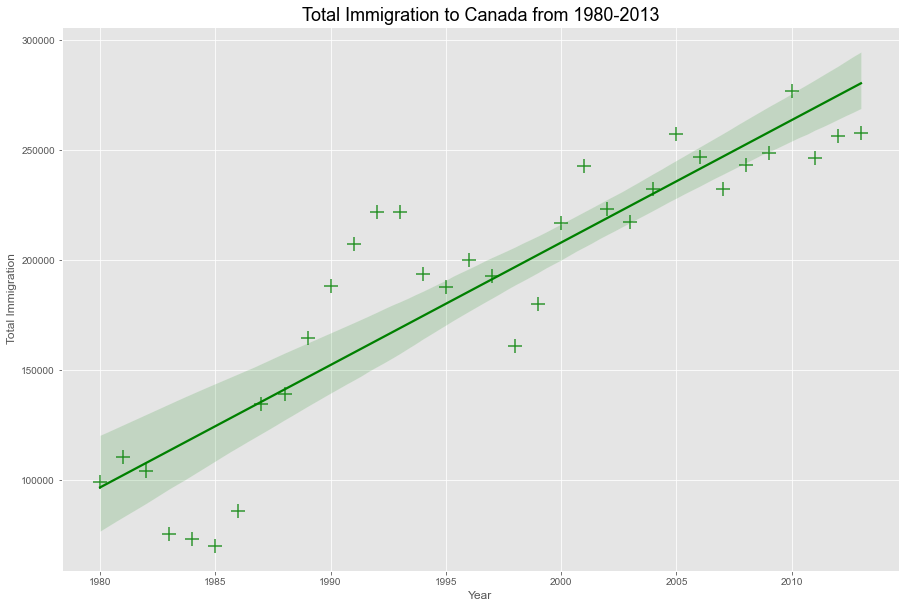

In [36]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

sns.set(font_scale=1.5)

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

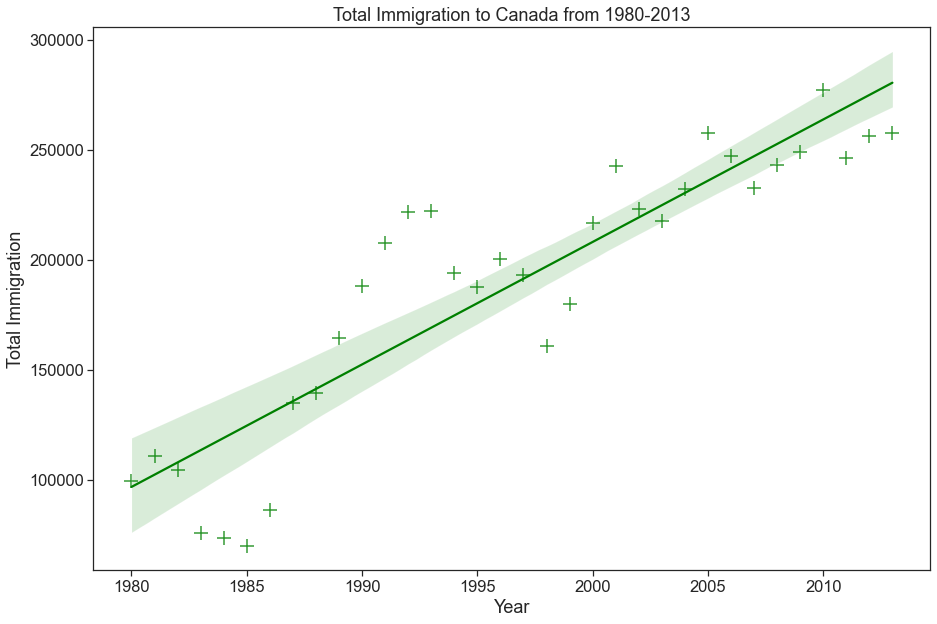

In [37]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

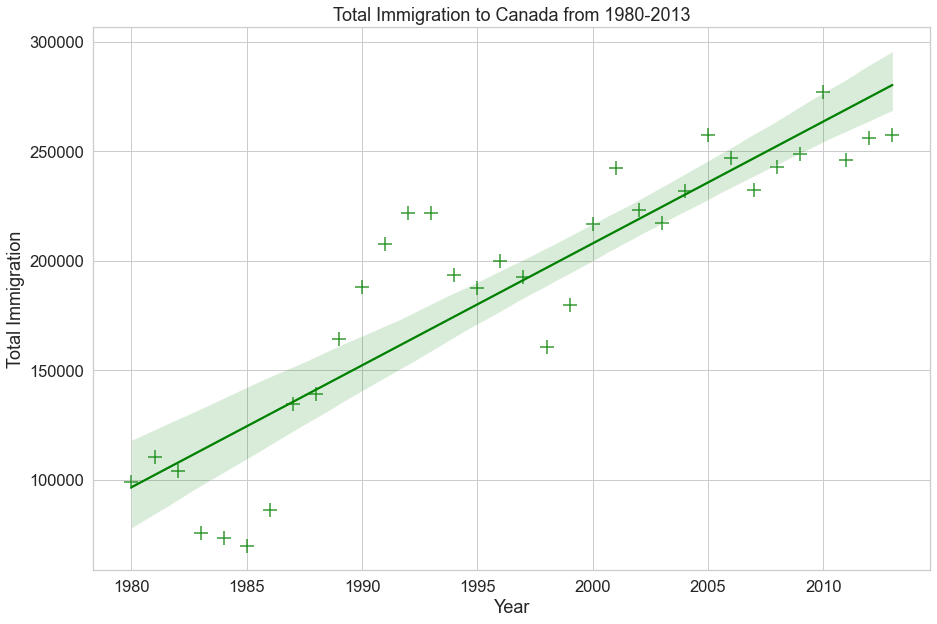

In [38]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980-2013')

Text(0.5, 1.0, 'Total Immigration from Denmark, Sweden, and Norway to Canada from 1980-2013')

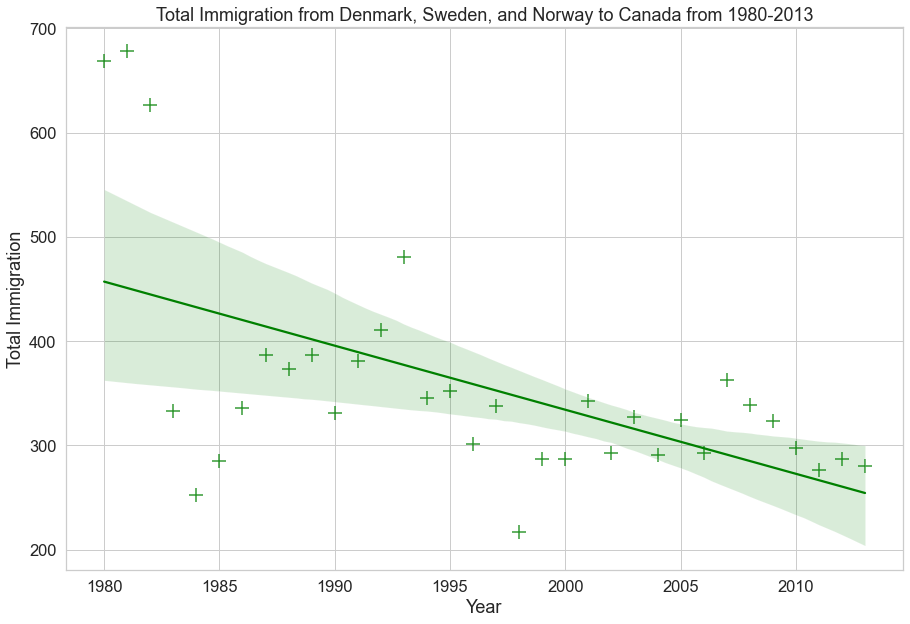

In [39]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)

#rename columns
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)

plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada from 1980-2013')


## PART 2

In [40]:
!pip install folium

In [41]:
import folium

In [42]:
word_map = folium.Map()
word_map

In [43]:
word_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)
word_map

In [44]:
word_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=11)
word_map

In [45]:
word_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=15)
word_map

## Stamen Toner Maps

In [46]:
word_map = folium.Map(location=[-6.992620, 110.4207485], zoom_start=13, tiles='Stamen Toner')
word_map

## Stamen Terrain Maps

In [47]:
word_map = folium.Map(location=[-6.992620, 110.4207485], zoom_start=13, tiles='Stamen Terrain')
word_map

## Maps with Markers

In [48]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [49]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [53]:
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

df_incidents.shape

(100, 13)

In [54]:
latitude = 37.77
longitude = -122.42

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map

In [55]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    )
)

sanfran_map.add_child(incidents)

In [59]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    )
)

latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

sanfran_map.add_child(incidents)

In [62]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

sanfran_map


In [68]:
from folium import plugins

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(incidents)

sanfran_map

## Choropleth Maps

In [80]:
df_can = pd.read_excel('C:/Users/Rizqatasyaa/OneDrive/Documents/HACTIVE/Canada.xlsx',
             sheet_name='Canada by Citizenship',
             skiprows=range(20),
             skipfooter=2)

print('Data downloaded and read into a dataframe!')

df_can.head()

Data downloaded and read into a dataframe!


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [81]:
# clean up the dataset to remove unnecessary columns
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# rename the columns
df_can.rename(columns= {'OdName':'Country',
                         'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 39)


C:\Users\Rizqatasyaa\AppData\Local\Temp\ipykernel_19004\3175394826.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [82]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [85]:
world_geo = pd.read_json('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json')
world_geo

,type,features
0,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Af..."
1,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'An..."
2,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Al..."
3,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Un..."
4,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Ar..."
...,...,...
172,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'We..."
173,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Ye..."
174,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'So..."
175,FeatureCollection,"{'type': 'Feature', 'properties': {'name': 'Za..."
